In [1]:
import numpy as np
import pandas as pd

import glob

import cv2
import matplotlib.pyplot as plt

In [14]:
real_tka_images = np.concatenate([np.random.choice(list(glob.iglob("data/TKA_Images/KneeAP/**")), 3),
                                  np.random.choice(list(glob.iglob("data/TKA_Images/TkaAP/**")), 3)])
fake_tka_images = np.random.choice(list(glob.iglob("GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/**")), 6)

In [15]:
real_tka_images

array(['data/TKA_Images/KneeAP/144.jpg', 'data/TKA_Images/KneeAP/763.jpg',
       'data/TKA_Images/KneeAP/470.jpg', 'data/TKA_Images/TkaAP/137.jpg',
       'data/TKA_Images/TkaAP/250.jpg', 'data/TKA_Images/TkaAP/220.jpg'],
      dtype='<U31')

In [98]:
def generate_histogram(image, channel, mask, hist_size, hist_ranges):
    return cv2.calcHist(image, channel, None, hist_size, hist_ranges)

def plot_image_hist(real_images, fake_images):
    #assert len(real_images == fake_images)
    n_rows = 4
    n_cols = len(real_images)
    
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,10))
    
    for i, img in enumerate(real_images):
        im = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (512, 512))
        # im = (im - np.min(im)) / (np.max(im) - np.min(im))
        hist = generate_histogram(im, [0], None, [256], [0, 256])
        print(hist.shape)
        ax[0, i].imshow(im, cmap="gray")
        ax[1, i].plot(hist)
        
    for i, img in enumerate(fake_images):
        im = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (512, 512))
        #im = (im - np.min(im)) / (np.max(im) - np.min(im))
        hist = generate_histogram(im, [0], None, [256], [0, 256])
        ax[2, i].imshow(im, cmap="gray")
        ax[3, i].plot(hist)
        
    ax[0, 2].set_title("Real Images")
    ax[1, 2].set_title("Histogram")
    ax[2, 2].set_title("Fake Images")
    ax[3, 2].set_title("Histogram")


def plot_avg_hist(real_images, fake_images):
    # assert len(real_images == fake_images)
    n_rows = 1
    n_cols = 2
    
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,20))
    
    avg_real_hist = np.zeros((256, 1))
    avg_fake_hist = np.zeros((256, 1))
    for i, img in enumerate(real_images):
        im = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (256, 256))
        # im = (im - np.min(im)) / (np.max(im) - np.min(im))
        # ax[0, i].imshow(im, cmap="gray")

        hist = generate_histogram(im, [0], None, [256], [0, 256])
        avg_real_hist = avg_real_hist + hist
        
    for i, img in enumerate(fake_images):
        im = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (256, 256))
        # ax[1, i].imshow(im, cmap="gray")

        #im = (im - np.min(im)) / (np.max(im) - np.min(im))
        hist = generate_histogram(im, [0], None, [256], [0, 256])
        avg_fake_hist = avg_fake_hist + hist
        
    avg_real_hist = avg_real_hist / len(real_images)
    avg_fake_hist = avg_fake_hist / len(real_images)
    ax[0].plot(avg_real_hist) 
    
    ax[1].plot(avg_fake_hist) 

    

(256, 1)
(256, 1)
(256, 1)
(256, 1)
(256, 1)


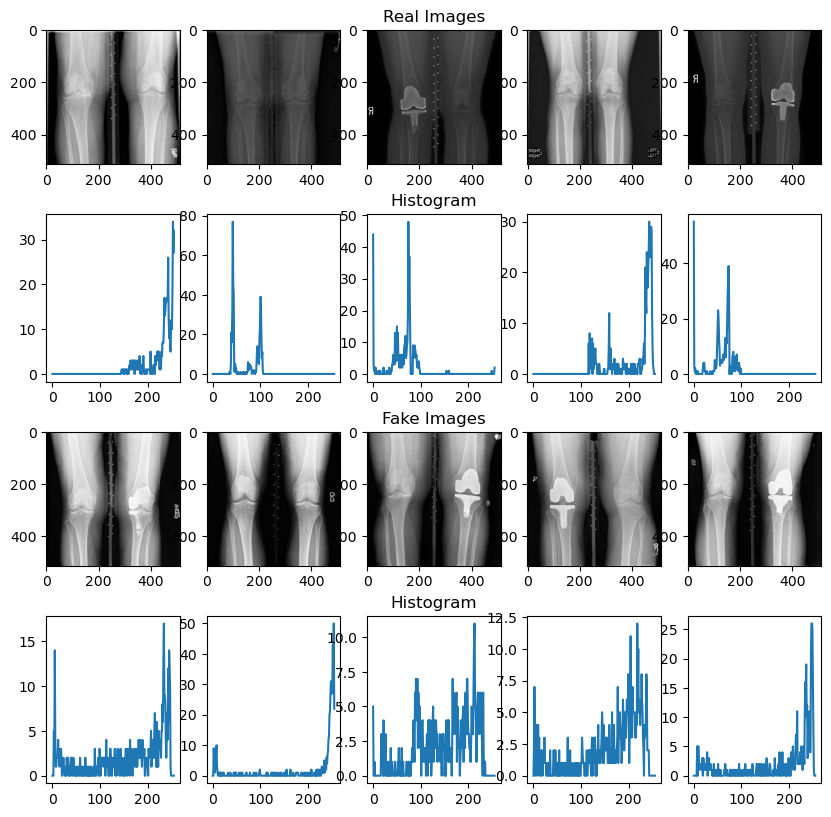

In [88]:
real_tka_images = np.random.choice(list(glob.iglob("data/TKA_Images/KneeAP/**")) + list(glob.iglob("data/TKA_Images/TkaAP/**")), 5)
fake_tka_images = np.random.choice(list(glob.iglob("GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/**")), 5)
plot_image_hist(real_tka_images, fake_tka_images)

In [78]:
real_max = 0
for i, img in enumerate(real_tka_images):
    im = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    real_max += np.max(im)
     
fake_max = 0
for i, img in enumerate(fake_tka_images):
    im = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    fake_max += np.max(im)

In [79]:
real_max/len(real_tka_images)

241.2133431085044

In [80]:
fake_max/len(fake_tka_images)

247.8184

In [202]:
pairings = [
    ("data/TkaFewShotCompleteDataset/img/img/00044904.jpg" , "GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/6929.png"),
    ("data/TkaFewShotCompleteDataset/img/img/00183804.jpg", "GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/30.png"),
    ("data/TkaFewShotCompleteDataset/img/img/01727504.jpg", "GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/6967.png"),
    ("data/TkaFewShotCompleteDataset/img/img/01566104.jpg", "GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/3342.png"),
    ("data/TkaFewShotCompleteDataset/img/img/01737205.jpg", "GAN_Knee_KL_Classification/JAMIA_TKA_100shot_eval_30000/eval_49000/img/6980.png")

]

In [203]:
real = [p[0] for p in pairings]
fake = [p[1] for p in pairings]

(256, 1)
(256, 1)
(256, 1)
(256, 1)
(256, 1)


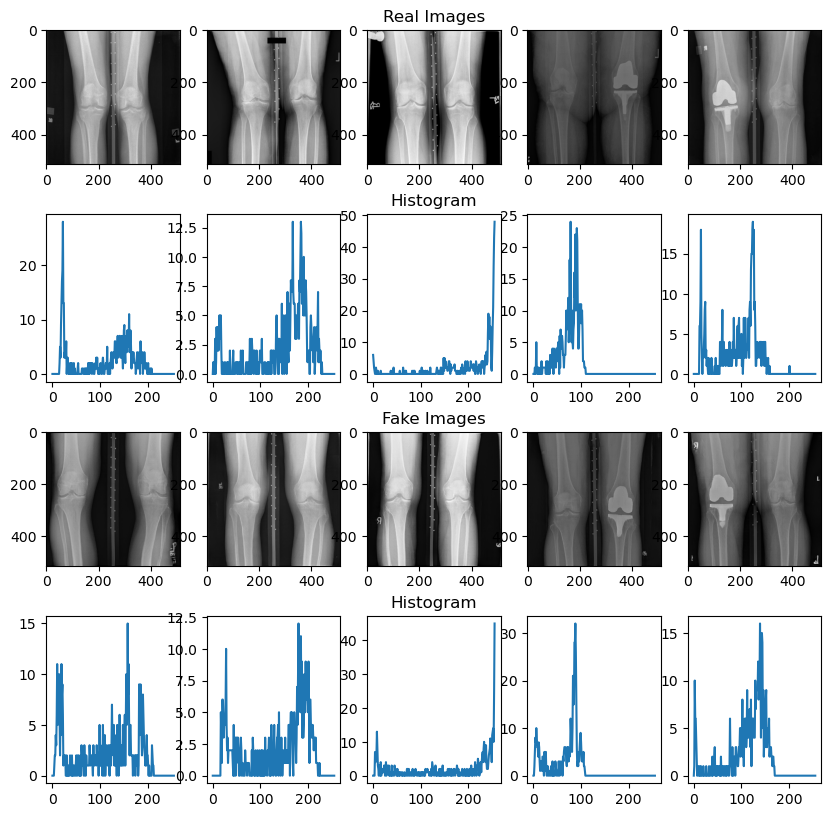

In [204]:
plot_image_hist(real, fake)